# Turing Machine and Deep Learning

## Assignment 2: Supervised Classification Problems

This notebook is meant for you to review and reflect on the content of Lecture 2, which was mainly about supervised learning problems in the general context of classification. We will reflect mainly on model and hyperparameter selection over the models we have discussed during the lecture: logistic regression, decision trees, random forests and support vector machines. This notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


# Question 1 -- Classification Metrics

To contextualise, we learnt of 4 metrics in class: accuracy, precision, recall and F1 score. Answer the following text questions in the following markdown cell.
1. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would be preferable.
2. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would fail.
3. In which situations would the F1 score be helpful? Give one concrete example.

1.
    Accuracy: would be useful in a case where false positives and false negatives are equally costly, and what matters most is how accurate the result is. For example: a ML model that attempts to predict educational outcomes based off IQ and EQ scores.
   
   Precision: Useful measure in a case where false positives can be extremely costly. This would be a preferable measure in a ML problem where text analysis is used to detect evidence of cheating. A false positive could lead to a student facing harsh punishments, which could be extremely costly.
   
   Recall: Useful measure in a case where false negatives can be extremely costly. A perfect example would be the screening of a disease. A false positive would not be very costly, since more accurate results would probably be found after further screening, but a false negative may be fatal.
   
2
    Accuracy: This measure would fail in the context of the screening of a rare disease. For instance, if the disease is present in only 0.5% of the population, then even if the model predicts a negative result each time, the accuracy rate will be 99.5%- which may seem misleadingly accurate.
    
    Precision: This measure would fail in the context where false negatives are extremely costly. For example,

## Question 2 -- CIFAR 10

As we've discussed last week, one of the prime issues with ML is figuring out what model you are going to use and when. In this case, we're going to use the [CIFAR-10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10) dataset from TensorFlow, another benchmarking dataset. This is a considerably larger dataset, and contains coloured images. For the sake of computation time, we are just going to use the first 1000 training images but the full test set (though in a proper ML setting we would prefer to use all training data). The images are 32x32 coloured pixes. There are 10 labels which are integers by default. The dictionary `class_labels` translate them to their text label equivalents (referenced from [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)).

170498071/170498071 [==============================] - 4s 0us/step


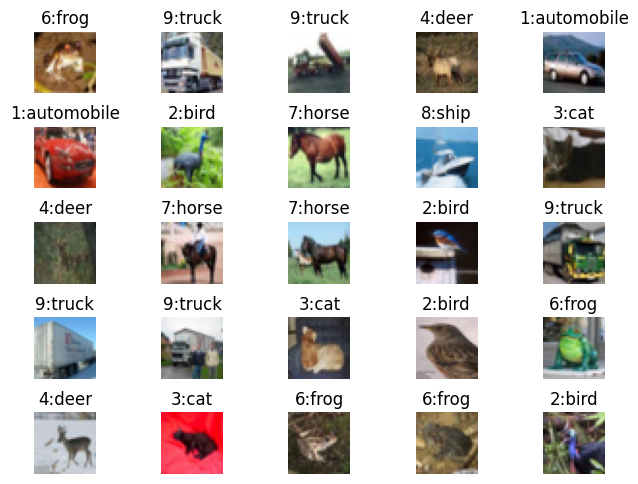

In [ ]:
# don't need to edit anything here,
# just run this cell
import tensorflow as tf

# get dataset
from tensorflow.keras.datasets import cifar10
# get common libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # this is a new one: makes loading bars

def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = cifar10.load_data()
    train_X, train_y, test_X, test_y = train_X[:n_train], train_y[:n_train], test_X[:n_test], test_y[:n_test]
    train_y, test_y = train_y.squeeze(), test_y.squeeze()
    return train_X, train_y, test_X, test_y

n_train, n_test = 1000, 1000

train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

fig, axs = plt.subplots(5,5)
axs = axs.flatten()
fig.tight_layout(pad=0.3)

class_labels = {0:"airplane",
                1:"automobile",
                2:"bird",
                3:"cat",
                4:"deer",
                5:"dog",
                6:"frog",
                7:"horse",
                8:"ship",
                9:"truck"}

for i, ax in enumerate(axs):
    ax.imshow(train_X[i])
    ax.set_title(f"{train_y[i]}:{class_labels[train_y[i]]}")
    ax.axis("off")

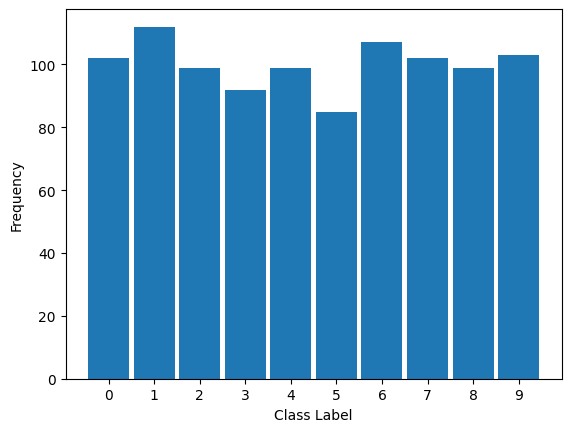

In [ ]:
# making sure the quantity of examples for each label are about the same
plt.hist(train_y, bins=10, rwidth=0.9)
plt.xticks(0.9*np.arange(10)+0.45, range(10))
plt.ylabel("Frequency")
plt.xlabel("Class Label")
plt.show()

## Question 2.1 -- Preprocessing

The first thing we should do is preprocess the images so that they are ready to be input into our models. First, print out the shape of the dataset's inputs (`train_X`).

In [ ]:
print(train_X.shape)

(1000, 32, 32, 3)


**Q 2.1.1** What does each value in the tuple that was printed out mean?

The first element refers to the total number of images, second and third (32) refer to the number of pixels akong the

**Q 2.1.2** Next, flatten the pixel values to a single vector. What is the length of this vector? Print out the shape of the flattened dataset's inputs once more.

In [ ]:
# Your answer here
def flatten_cifar10(samples):
    return np.reshape(samples, (samples.shape[0], -1))  # Flattening each sample individually

train_X = flatten_cifar10(train_X)
test_X = flatten_cifar10(test_X)

#Changing length of train_y and test_y to use for the logistic regression model
# train_y = np.ravel(train_y)
# test_y = np.ravel(test_y)

print(len(test_X))
print(len(train_X))
print(train_y.shape)

1000
1000
(1000,)


## Question 3 -- Model Selection using Grid Search

In the lecture, we have seen four different ML classification algorithms: logistic regression, decision trees, random forests and support vector machines. In this assignment, we will figure out which is best, and a basic method to figure out the best way to tune the parameters of each one. Remember, a hyperparameter is something that you choose by hand about the model or the way it trains.

### Question 3.1 -- Logistic regression

Use `sklearn` (as in the lecture notebook) to classify the CIFAR10 sub-dataset. There are not a lot of major hyperparameters to tune here, so this exercise should be straightforward. Create a LogisticRegression object, fit it on the training data, and compute the train and test accuracies.

*Expected runtime: ~1min*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR = modelLR.fit(train_X, train_y)
train_predictions = modelLR.predict(train_X)
test_predictions = modelLR.predict(test_X)
print("Training score:", accuracy_score(train_y, train_predictions))
print("Testing score: ", accuracy_score(test_y, test_predictions))

Training score: 0.948
Testing score:  0.257


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q 3.1.2** Does the model work well in your opinion? What about whether it is over/underfitting?

The model works well for the training data, but performs very poorly for the test data. This indicates overfitting.

### Question 3.2 -- Decision Trees

Decision trees have one main hyperparameter that you can tune -- this is the maximum depth of the tree being trained. Thus, we'll try and figure out what depth is the optimal for our purposes.

An important thing to note is that decision trees are randomized initially -- this means that two trees of the same depth may have wildly different performances, depending on how they were initialized.

**Q 3.2.1** Loop over max tree depths from $d=1$ to $d=15$ and store the mean and standard deviation of train and test scores for 10 randomly initialised trees.

*Expected runtime: <5 mins*

In [ ]:
from sklearn import tree

train_acc_mean, train_acc_std = [], [] # to store the training accuracies
test_acc_mean, test_acc_std = [], []   # to store the testing accuracies

for d in tqdm(range(1, 16)): # loop over tree depths
    train_perfs = [] # store interim train scores
    test_perfs = []  # store interim test scores
    for n in range(1, 11):   # loop over random initializations
        # Initialize new decision tree model
        modelDT = tree.DecisionTreeClassifier(max_depth=d)

        # Train model
        modelDT.fit(train_X, train_y)

        # Make predictions
        train_predictions = modelDT.predict(train_X)
        test_predictions = modelDT.predict(test_X)

        # Store performance scores
        train_perfs.append(accuracy_score(train_y, train_predictions))
        test_perfs.append(accuracy_score(test_y, test_predictions))

    # Calculate mean and standard deviation of scores for this depth
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))

100%|██████████| 15/15 [04:49<00:00, 19.29s/it]


**Q 3.2.2** Plot the test and train means with errorbars equal to one standard deviation (look at [plt.errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) for reference). Don't forget to add labels.

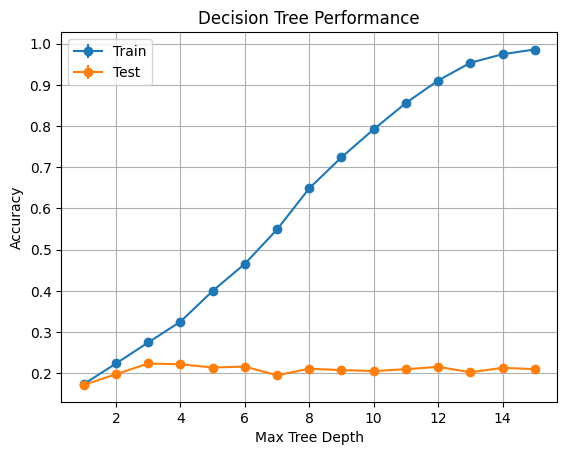

In [ ]:
import matplotlib.pyplot as plt

# Plot training mean with error bars
plt.errorbar(range(1, 16), train_acc_mean, yerr=train_acc_std, fmt='-o', label='Train')

# Plot testing mean with error bars
plt.errorbar(range(1, 16), test_acc_mean, yerr=test_acc_std, fmt='-o', label='Test')

# Add title
plt.title('Decision Tree Performance')

# Add y-label
plt.ylabel('Accuracy')

# Add x-label
plt.xlabel('Max Tree Depth')

# Add grid
plt.grid()

# Add legend
plt.legend()

# Show plot
plt.show()


**Q 3.2.3**

1. Is there a lot of variation of the performance of the trees (enough to question statistical significance)?
2. Which model (of the ones you tested) performed best on the training set? Which performed best on the test set?
3. At what depth do models start to overfit the training data?

1. No, there is not a lot of variation in the performance of the trees when looking at the accuracy of prediction for the test set.
2. The model with most decision trees perorms the best on the training set.
3. In my opinion, around a depth of 4, the model starts to overfit the training data. This is because after this, the performance on the test set begins to deteroriate and then also plateau.

## Question 3.3 -- Random Forests
Just like in the decision trees, one hyperparameter you can choose is the depth of the tree. However, another important one is the number of decision trees. In this case, the performance is affected by the combination of these hyperparameters, and so we need to train and evaluate them at each combination.

**Q 3.3.1** Loop over $n_{trees}=10$ to $n_{trees}=100$ in increments of 10, and max tree depths from $d\in[1,3,5,7,9,11,13,15]$ and store the mean and standard deviation of train and test scores for 5 randomly initialised trees.

*Expected runtime: ~9 minutes*

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from tqdm import tqdm

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Define hyperparameters range
n_trees_range = range(10, 101, 10)
max_depth_range = [1, 3, 5, 7, 9, 11, 13, 15]

# Store results
train_acc_mean = np.zeros((len(n_trees_range), len(max_depth_range)))
train_acc_std = np.zeros((len(n_trees_range), len(max_depth_range)))
test_acc_mean = np.zeros((len(n_trees_range), len(max_depth_range)))
test_acc_std = np.zeros((len(n_trees_range), len(max_depth_range)))

for tree_idx, n_trees in tqdm(enumerate(n_trees_range), total=len(n_trees_range)):
    for d_idx, d in enumerate(max_depth_range):
        train_perfs = []
        test_perfs = []
        for n in range(5):  # 5 random initializations
            # Initialize Random Forest classifier
            rf = RFC(n_estimators=n_trees, max_depth=d, random_state=None)

            # Perform cross-validation
            scores = cross_val_score(rf, X, y, cv=5)
            train_perfs.append(scores.mean())
            test_perfs.append(scores.std())

        # Store results
        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

# Printing results
print("n_trees\tmax_depth\ttrain_mean\ttrain_std\ttest_mean\ttest_std")
for i, n_trees in enumerate(n_trees_range):
    for j, max_depth in enumerate(max_depth_range):
        print(f"{n_trees}\t{max_depth}\t\t{train_acc_mean[i][j]:.4f}\t\t{train_acc_std[i][j]:.4f}\t\t{test_acc_mean[i][j]:.4f}\t\t{test_acc_std[i][j]:.4f}")


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lo

n_trees	max_depth	train_mean	train_std	test_mean	test_std
10	1		0.0100		0.0023		0.0068		0.0016
10	3		0.0118		0.0027		0.0075		0.0016
10	5		0.0095		0.0022		0.0092		0.0032
10	7		0.0081		0.0031		0.0070		0.0028
10	9		0.0050		0.0022		0.0059		0.0013
10	11		0.0118		0.0066		0.0089		0.0049
10	13		0.0095		0.0030		0.0106		0.0031
10	15		0.0091		0.0038		0.0086		0.0038
20	1		0.0095		0.0017		0.0058		0.0012
20	3		0.0131		0.0052		0.0087		0.0040
20	5		0.0104		0.0049		0.0076		0.0032
20	7		0.0082		0.0031		0.0074		0.0015
20	9		0.0072		0.0052		0.0082		0.0051
20	11		0.0077		0.0037		0.0075		0.0030
20	13		0.0068		0.0014		0.0078		0.0030
20	15		0.0090		0.0057		0.0078		0.0029
30	1		0.0099		0.0018		0.0063		0.0011
30	3		0.0095		0.0017		0.0076		0.0028
30	5		0.0063		0.0017		0.0078		0.0031
30	7		0.0091		0.0052		0.0070		0.0024
30	9		0.0095		0.0044		0.0090		0.0031
30	11		0.0072		0.0026		0.0063		0.0018
30	13		0.0091		0.0050		0.0091		0.0039
30	15		0.0082		0.0011		0.0080		0.0013
40	1		0.0090		0.0000		0.0061		0.0019
40	3		0.

Looping over several variables and testing each combination is called a **grid search**. Since we have two hyperparameters, we cannot plot a 1D line to see which is best, as we did for normal DTs. One way to visualize this instead is a heatmap. For this, we can `seaborn`'s [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.  

**Q 3.3.2** Plot two heatmaps: one for the train accuracies and one for the test ones.

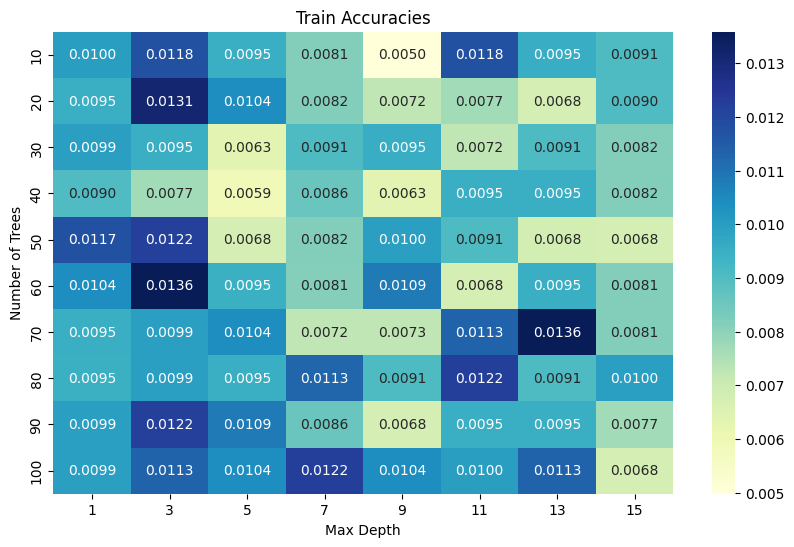

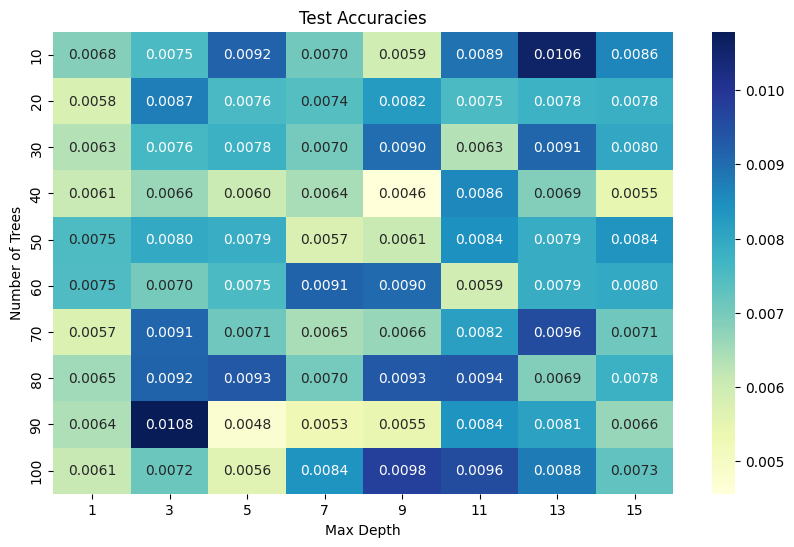

In [ ]:
import seaborn as sns
# Figure 1: Train Accuracies Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_acc_mean, annot=True, fmt=".4f", cmap="YlGnBu", xticklabels=max_depth_range, yticklabels=n_trees_range)
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.title('Train Accuracies')
plt.show()

# Figure 2: Test Accuracies Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(test_acc_mean, annot=True, fmt=".4f", cmap="YlGnBu", xticklabels=max_depth_range, yticklabels=n_trees_range)
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.title('Test Accuracies')
plt.show()

**Q 3.3.2**
1. What trends with respect to each hyperparameter do the heatmaps show you?

2. What model performs best on the train set? What model performs best on the test set?
3. What model would you choose to deploy and why?

1. At least for the training accuracies, it seems that trees with lower depths and a higher number of trees.
2. Best model for train set is model with $d = 3$ and $n_{\text{trees}} = 60$ or $d =13$ and$n_{\text{trees}} = 70$. On the test set, the best performing model is one with $d = 3$ and $n_{\text{trees}} = 90$.
3. I would choose to deploy the model with $d = 3$ and $n_{\text{trees}} = 90$. This is because it seems to be the best model since it predicts the test data the best, and does not sacrifice a lot in training data accuracies either.

## Question 3.4 -- Support Vector Machines

`sklearn`'s SVM classifier implementation (called "SVC", we already met them in the lecture) contains quite a number of hyperparameters you can tune. The ones we are looking at today are the kernel, the parameter `C` (which is some penalty term for incorrectly classifying a data point, applicable to the RBF kernel), `gamma`, which is a measure of how important closer points to the decision boundary are with respect to the decision boundary (applicable to the RBF kernel), and `degree`, which is the degree of the polynomial function (applicable to the poly kernel). Let $C\in\{0.1, 1, 10, 100\}$ and $gamma\in\{10^x|-2\leq x\leq 2, x\in\mathbb{Z}\}$. Let us use $degree\in\{2,3,4\}$.

A note about the kernel: In short, this is a function that determines what the shape of the decision boundary are. The choices that we can check out here (there are more) are `linear` (linear decision boundary), `poly` (polynomial) and `rbf` (radial basis function) in order of flexibility.

Since we are trying to optimize for a number of different parameters, writing out all the code ourselves gets a bit messy. Instead, we use `sklearn` again! The class in question is called `GridSearchCV`, which performs a grid search over parameters with specified values.

The 'CV' part of the name refers to the fact that we are performing *cross-validation*, which is related to the concept of validation sets that we encountered last week. We will cover it in a future lecture, but for now, the way it works is that it splits the training set into $k$ sets (called 'folds') and iteratively trains on $k-1$ folds and validates on the remaining one. The result is the mean over $k$ iterations. CV is considered the 'gold standard' with respect to analysing model robustness. We will use $k=5$ (appropriately called *5-fold cross-validation*), which is standard for a first analysis.

**Q 3.4.1** Run a gridsearch with 5-fold cross-validation over the hyperparameters discussed above to find an optimal SVC model. Please look at GridSearchCV's documentation for more information.

*Expected runtime: Around 15 minutes if you're lucky.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid_svm = [
    {'kernel': ['linear', 'poly', 'rbf'],
     'C': [0.1, 1, 10, 100],
     'degree': [2, 3, 4],
     'gamma': [10**x for x in range(-2, 3)]}
]

# Create the cross-validation object
optimal_params_svm = GridSearchCV(
    estimator=SVC(),             # Support Vector Classifier instance
    param_grid=param_grid_svm,   # Grid search params
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy'           # Use accuracy measure for best hyperparameters
)

# Fit the grid search to find the optimal parameters
optimal_params_svm.fit(train_X, train_y)

# Print the best parameters and their corresponding score
print(
    "The best parameters are %s with a score of %0.2f"
    % (optimal_params_svm.best_params_, optimal_params_svm.best_score_)
)


**Q 3.4.2**
1. How many combinations of parameters are there? Why?
2. Using 5-fold validation, how many models do you train in total?

1. There are 180 combinations of parameters because there are 3 choices for the kernel, 4 choices for C, 3 choices for degree, and 5 choices for gamma.

2. Using 5-fold cross-validation, we train a total of 900 models (180 combinations * 5 folds).

**Q 3.4.3**
Create a model `modelSVC` with the optimal parameters you found above and print out the train and test accuracies.

In [ ]:
modelSVC = SVC(...) # create model
modelSVC = ...      # train model
print("Training score:", ...)
print("Testing score: ", ...)

## Question 4 -- Training and inference speed
Depending on the application, the choice of model may be affected by more than just the raw score. One of these factors is *time* -- specifically, how long does the model take to train, and how long does it take to make a prediction. In this case we're increasing the number of training points to 5000.

**Q 4.1** Create models with the  that you found above, measure how long it takes for it to train and classify images from the test and train set, along with their accuracies (a classification, or a single run of a model, is generally called an 'inference'). We generally store time with an action taken (fit or inference) *per image* and the inference times *per image*.

*Runtime: ~3mins*

In [ ]:
from time import perf_counter

n_train, n_test = 5000, 1000  # Number of training and testing data points
train_X, train_y = get_data_subset(n_train)
test_X, test_y = get_data_subset(n_test)

# Flatten images
train_X = train_X.reshape(n_train, -1)
test_X = test_X.reshape(n_test, -1)

# Set up lists to store scores and times
train_scores = []
test_scores = []
fit_times = []
inf_times = []

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """ Trains, times and evaluates a given instantiated model on data """

    start = perf_counter()               # Check current (start) time
    model = model.fit(train_X, train_y)  # Fit the model
    end = perf_counter()                 # Check current (end) time
    fit_time = (end - start) / n_train   # Compute interval per image

    # Time inference over train score
    start = perf_counter()
    train_pred = model.predict(train_X)
    train_score = accuracy_score(train_y, train_pred)
    end = perf_counter()
    train_score_time = (end - start) / n_train  # Compute interval per image

    # Time inference over test score
    start = perf_counter()
    test_pred = model.predict(test_X)
    test_score = accuracy_score(test_y, test_pred)
    end = perf_counter()
    test_score_time = (end - start) / n_test   # Compute interval per image

    return train_score, test_score, fit_time, train_score_time, test_score_time

# Create models
modelLR = LogisticRegression(max_iter=1000)
modelDT = DecisionTreeClassifier()
modelRFC = RandomForestClassifier(n_estimators=100)
modelSVC = SVC()

# Train and evaluate models
for model in tqdm([modelLR, modelDT, modelRFC, modelSVC]):
    train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(model, train_X, train_y, test_X, test_y)
    # Add these values to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    fit_times.append(fit_time)
    inf_times.append((train_score_time, test_score_time))

Plot two barplots:
1. **Q 4.2** On one, plot a dual barplot showing the test and train accuracies.
2. **Q 4.3** On the other, plot a double barplot showing the training time *per image* and the inference times *per image* (so divide the total time by the number of images).

For each, make sure you don't forget the unit of measurement, add a title and axis labels and make sure there are labels and a legend.

In [ ]:


model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(len(model_names))

# Plotting the bars
fig, ax1 = plt.subplots()

# Barplot for accuracies
train_accuracy = ax1.bar(x - bar_width/2, train_scores, bar_width, label='Train Accuracy')
test_accuracy = ax1.bar(x + bar_width/2, test_scores, bar_width, label='Test Accuracy')

# Add labels, title, and legend
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train and Test Accuracies')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()

# Plot


In [ ]:
# Plotting the times
fig, ax = plt.subplots()

# Barplot for fit times
fit_bar = ax.bar(x - bar_width/2, fit_time_per_image, bar_width, label='Training Time per Image')

# Barplot for inference times
inference_bar = ax.bar(x + bar_width/2, train_score_time_per_image, bar_width, label='Inference Train Time per Image')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Time (seconds)')
ax.set_title('Training and Inference Times per Image')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


**Q 4.4**
1. What model is the fastest to train?
2. What model is fastest to infer?
3. What model has the highest train accuracies? What model has the highest test accuracies?
4. What model would you choose to use? Why?

Apologies, for some reason my Google Colab crashed at this point and won't run the last block of code. I can't exactly tell which would run faster. I did try to run it, but it's not working, so I'm submitting this as is and will see if I can edit it before the deadline.